ENS'IA - Session 4: Convolutional neural networks
-----
Today, we move on to **Convolutional neural networks (CNN)**!
These are neural networks specialized in image processing.

You will implement a basic CNN architecture and learn some techniques to boost your scores!

Let's load the libraries we will use along with the CIFAR-10 data

In [ ]:
# We import some useful things for later
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

(x_train, y_train), (x_test, y_test) = cifar10.load_data() # We load the dataset

2.9.2
170498071/170498071 [==============================] - 2s 0us/step


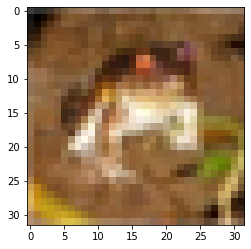

[6]


In [ ]:
# Let's visualize an example and its class
plt.imshow(x_train[0])
plt.show()

print(y_train[0])

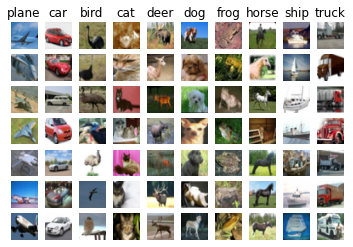

In [ ]:
# Dataset visualization
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_count = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * class_count + y + 1
        plt.subplot(samples_per_class, class_count, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

Data preprocessing... Do you remember which ones? :)

In [ ]:
# TODO... Many things possible!
# For example, you can transform your y using one hot encoding...

We now load the required libraries for the CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout

We then build our CNN. Here is the order On fabrique ensuite notre CNN.

Here is the order we recommend:

- Convolution, 32 filters, 3x3  
- Convolution, 32 filters, 3x3  
- MaxPool
- Dropout  
<br>
- Convolution, 64 filters, 3x3  
- Convolution, 64 filters, 3x3  
- MaxPool  
- Dropout  
<br>
- Convolution, 128 filters, 3x3  
- Convolution, 128 filters, 3x3  
- MaxPool  
- Dropout  
<br>
- Flatten  
- Dense  
- Dropout  
- Dense  

In [ ]:
model = Sequential([
  # TODO... looks pretty empty to me!
])

model.summary() # To check our model!

We have at our disposal a training dataset of 50 000 images, which is... quite limited. Actually, we would like to have an infinity of images for our training and, to achieve this goal, we are going to do some **Data augmentation**.

In other words, we are going to create new images from the ones we have.

For that, Keras has a pretty handy "ImageDataGenerator" (look for its doc online!) which is going to do random modifications on the images we feed the neural network with.

Which modifications could be useful?

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    horizontal_flip=True,
)

In order to improve our score as much as possible, we will use a *callback*,
which is going to decrease the learning rate along in our training.
More precisely, if after X epochs the metric we chose (*accuracy*) has not
improved, then we decrease the learning rate.

In [ ]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
            monitor = "val_accuracy",
            factor=np.sqrt(0.1),
            patience=3,
            min_lr=0.5e-6)

Another callback will allow us to save the best version of our neural network
during the training. After each epoch, if the network improves its score on the validation set, we save it.

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.hdf5', verbose=1, save_best_only=True)

Let's train the model! For that, we will use the functions we already saw together: *Adam* for the optimization and the loss function for the *cross entropy*.

In [ ]:
model.compile(
    # TODO :)
)

Quel batch size? Combien d'epochs? It's up to you! :P

In [ ]:
new_data = datagen.flow(..., ...,batch_size=...) #TODO

history = model.fit(new_data,
    # TODO
    callbacks=[reduce_lr,checkpointer]
)

Let's now see in detail how our neural network training process went:

In [ ]:
def plot_history(history):
    """
    Plot the loss & accuracy
    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_history(history)

Now that the training is done, we will load the saved model!

In [ ]:
model.load_weights('model.hdf5')

You can now evaluate your model on the test set

In [ ]:
model.evaluate(x_test, y_test)

To go further...
-----

Finished way too early? 
Take this opportunity to discover https://keras.io/applications/!

You will find pre-trained and pre-built models that are very powerful and applicable to different tasks. Have fun!

To go even further...
-----

By now, you should have understood how convolution works and should have learned a few techniques to boost your score!
You should now be able to start working on bigger and more complex data sets!
We invite you to go to kaggle (www.kaggle.com) where you can find many datasets on which it is possible to work and to observe the work of other people on these data. It's really good for learning and it's perfect if you want to deepen your knowledge!